In [67]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests

Testy stacjonarności i przyczynowości Grangera

In [68]:
def is_stationary(ts):
    p_val = adfuller(ts)[1]
    return p_val <= 0.05


def is_relevant(granger_result):
    tests = "ssr_ftest", "ssr_chi2test", "lrtest", "params_ftest"
    p_val = []
    for i in tests:
        p_val.append(granger_result[3][0][i][1])
    p_val = round(sum(p_val) / len(p_val), 2)
    return p_val <= 0.05

def get_F(granger_result):
    tests = "ssr_ftest", "params_ftest"
    f_val = []
    for i in tests:
        f_val.append(granger_result[3][0][i][0])
    f_val = round(sum(f_val) / len(f_val), 2)
    return f_val

def granger_test(df, main_col, cols):
    relevant = []
    for col in cols:
        try:
            x = grangercausalitytests(df[[main_col, col]], maxlag=[3], verbose=False)
            if is_relevant(x):
                f_val = get_F(x)
                relevant.append((col, f_val))
        except:
            print("There was an issue with: ", col)
    return relevant

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

def check_stationarity_all():
    # check stationarity of close and if it's not stationary check diffs
    for company in ["amzn", "aapl", "tsla", "msft", "goog", "googl"]:
        df = pd.read_csv(f"../datasets/v3/binned/{company}.csv")
        if not is_stationary(df["close"]):
            print(f"{company} 'close' isn't stationary")
            print("After pct_change():", is_stationary(df["diffs"]))

In [69]:
def simplify_name(name):

    pat = r"negative"
    pat2 = r"neutral"
    pat3 = r"positive"
    pat4 = r"num_sum"
    pat5 = r"relative"
    pat6 = r"comment"
    pat7 = r"retweet"
    name = re.sub(pat, "neg", name)
    name = re.sub(pat2, "neu", name)
    name = re.sub(pat3, "pos", name)
    name = re.sub(pat4, "count", name)
    name = re.sub(pat5, "rel", name)
    name = re.sub(pat6, "comm", name)
    name = re.sub(pat7, "rtwt", name)

    return name

In [70]:
def plot_F(f_vals, title, save_name):
    x = [i[1] for i in f_vals]
    y = [simplify_name(i[0]) for i in f_vals]
    fig, ax = plt.subplots()

    sns.barplot(x=x, y=y).set_title(title)

    plt.yticks(fontsize=7)
    plt.savefig(f'../plots/granger/{save_name}.pdf')
    plt.show()

In [ ]:
for company in ["amzn", "aapl", "tsla", "msft", "goog", "googl"]:
    df = pd.read_csv(f"../datasets/v3/binned/{company}.csv")
    kpss_test(df["diffs"])




In [5]:
check_stationarity_all()

amzn 'close' isn't stationary
After pct_change(): True
aapl 'close' isn't stationary
After pct_change(): True
tsla 'close' isn't stationary
After pct_change(): True
msft 'close' isn't stationary
After pct_change(): True
goog 'close' isn't stationary
After pct_change(): True
googl 'close' isn't stationary
After pct_change(): True


amzn: [('low', 3.18), ('vol', 9.83), ('comment_num_sum', 12.29), ('comp_mean', 9.97), ('comp_median', 4.36), ('is_negative_sum', 12.49), ('is_positive_sum', 5.85), ('like_num_sum', 11.48), ('neg_mean', 16.46), ('neg_std', 7.32), ('count', 55.39), ('pos_max', 8.01), ('pos_mean', 5.71), ('pos_std', 8.84), ('retweet_num_sum', 55.56), ('relative_count', 11.23)]


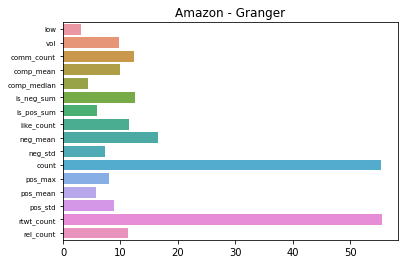

There was an issue with:  neg_min
There was an issue with:  pos_min
aapl: [('high', 4.52), ('vol', 4.04), ('comment_num_sum', 4.14), ('comp_max', 3.91), ('comp_mean', 13.88), ('comp_median', 2.65), ('is_negative_sum', 20.51), ('is_positive_sum', 6.5), ('like_num_sum', 2.78), ('neg_max', 10.92), ('neg_mean', 39.1), ('neg_std', 26.24), ('neu_mean', 4.08), ('count', 4.79), ('pos_max', 6.0), ('pos_mean', 4.94), ('pos_std', 8.77), ('retweet_num_sum', 9.02)]


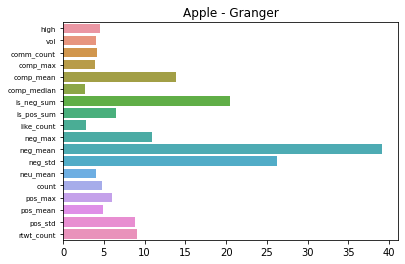

tsla: [('comp_mean', 10.43), ('is_negative_sum', 9.33), ('is_positive_sum', 4.02), ('neg_max', 3.56), ('neg_mean', 17.43), ('neg_std', 12.19), ('pos_max', 5.35), ('pos_mean', 3.96), ('pos_std', 7.76)]


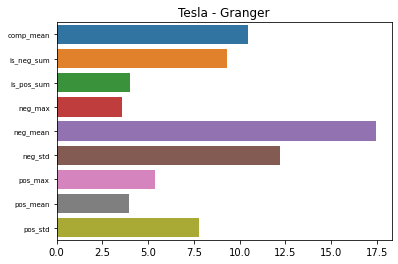

msft: [('vol', 8.72), ('comment_num_sum', 44.01), ('comp_mean', 4.6), ('is_negative_sum', 6.03), ('is_positive_sum', 4.61), ('like_num_sum', 50.14), ('neg_mean', 7.48), ('neg_median', 2.93), ('neg_min', 4.29), ('neg_std', 4.23), ('neu_min', 4.5), ('count', 71.71), ('pos_max', 14.25), ('pos_mean', 5.2), ('pos_std', 6.36), ('retweet_num_sum', 14.75), ('relative_count', 16.83)]


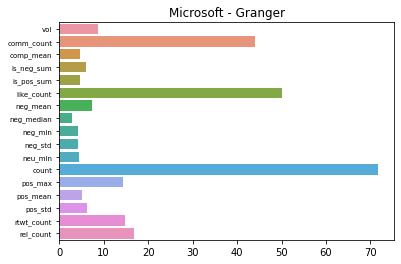

goog: [('vol', 5.58), ('comment_num_sum', 5.16), ('comp_mean', 2.95), ('is_negative_sum', 2.75), ('like_num_sum', 9.85), ('count', 20.85), ('pos_max', 5.89), ('retweet_num_sum', 5.51)]


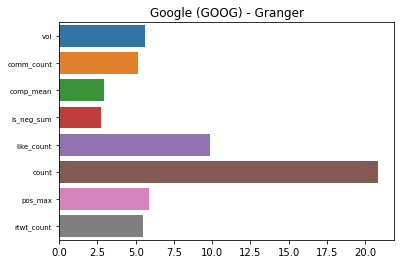

googl: [('high', 3.19), ('vol', 6.85), ('comment_num_sum', 6.07), ('is_negative_sum', 4.49), ('like_num_sum', 7.42), ('neg_mean', 7.38), ('neg_std', 5.07), ('neu_min', 6.7), ('count', 37.1), ('pos_max', 16.31), ('pos_mean', 2.84), ('pos_std', 6.68), ('retweet_num_sum', 24.53), ('relative_count', 9.4)]


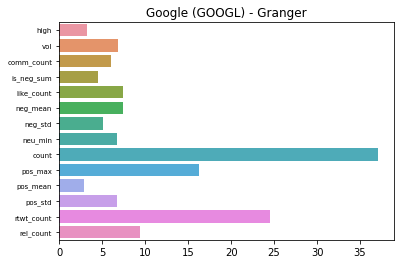

In [71]:
full_names = {
    "amzn": "Amazon",
    "aapl": "Apple",
    "msft": "Microsoft",
    "tsla": "Tesla",
    "goog": "Google (GOOG)",
    "googl": "Google (GOOGL)",
}
rel = {}
for company in ["amzn", "aapl", "tsla", "msft", "goog", "googl"]:
    df = pd.read_csv(f"../datasets/v3/binned/{company}.csv")

    vital_columns = ["post_date", "ticker", "close", "diffs", "bin_2", "bin_3", "bin_5"]
    cols = [i for i in df.columns if i not in vital_columns]

    relevant = granger_test(df, "diffs", cols)
    rel[company] = relevant

    print(f"{company}: {relevant}")
    plot_F(relevant, f"{full_names[company]} - Granger", company)

In [ ]:
grangercausalitytests(df[["close", "comp_mean"]], maxlag=3)

In [17]:
rel

{'amzn': [('low', 3.18),
  ('vol', 9.83),
  ('comment_num_sum', 12.29),
  ('comp_mean', 9.97),
  ('comp_median', 4.36),
  ('is_negative_sum', 12.49),
  ('is_positive_sum', 5.85),
  ('like_num_sum', 11.48),
  ('neg_mean', 16.46),
  ('neg_std', 7.32),
  ('count', 55.39),
  ('pos_max', 8.01),
  ('pos_mean', 5.71),
  ('pos_std', 8.84),
  ('retweet_num_sum', 55.56),
  ('relative_count', 11.23)],
 'aapl': [('high', 4.52),
  ('vol', 4.04),
  ('comment_num_sum', 4.14),
  ('comp_max', 3.91),
  ('comp_mean', 13.88),
  ('comp_median', 2.65),
  ('is_negative_sum', 20.51),
  ('is_positive_sum', 6.5),
  ('like_num_sum', 2.78),
  ('neg_max', 10.92),
  ('neg_mean', 39.1),
  ('neg_std', 26.24),
  ('neu_mean', 4.08),
  ('count', 4.79),
  ('pos_max', 6.0),
  ('pos_mean', 4.94),
  ('pos_std', 8.77),
  ('retweet_num_sum', 9.02)],
 'tsla': [('comp_mean', 10.43),
  ('is_negative_sum', 9.33),
  ('is_positive_sum', 4.02),
  ('neg_max', 3.56),
  ('neg_mean', 17.43),
  ('neg_std', 12.19),
  ('pos_max', 5.35),
  